#CSI41412 Assignment 1: Mobile Data Usage Data analysis

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


url = "https://raw.githubusercontent.com/Fahmi-IT/CSI4142_A1/refs/heads/main/Data/user_behavior_dataset.csv"
df = pd.read_csv(url)

#Introduction

Traditional methods of grouping customers by age or device are no longer effective for predicting network usage. Our analysis proves that demographics are irrelevant: a 60-year-old is just as likely to be a "heavy user" as a teenager. This report helps Product Managers pivot to Behavioral Segmentation. By analyzing real usage data—such as screen time and app intensity—we categorize subscribers into distinct "Usage Archetypes." This framework allows you to design smarter, lifestyle-based data plans that target how people act, rather than who they are, ensuring better network optimization and higher revenue efficiency.

In [12]:
print("--- Head of the Dataset ---")
print(df.head())
print("\n--- Data Info ---")
print(df.info())
print("\n--- Statistical Summary ---")
print(df.describe())
print("\n--- Missing Values Check ---")
print(df.isnull().sum())

--- Head of the Dataset ---
   User ID    Device Model Operating System  App Usage Time (min/day)  \
0        1  Google Pixel 5          Android                       393   
1        2       OnePlus 9          Android                       268   
2        3    Xiaomi Mi 11          Android                       154   
3        4  Google Pixel 5          Android                       239   
4        5       iPhone 12              iOS                       187   

   Screen On Time (hours/day)  Battery Drain (mAh/day)  \
0                         6.4                     1872   
1                         4.7                     1331   
2                         4.0                      761   
3                         4.8                     1676   
4                         4.3                     1367   

   Number of Apps Installed  Data Usage (MB/day)  Age  Gender  \
0                        67                 1122   40    Male   
1                        42                  944   47 

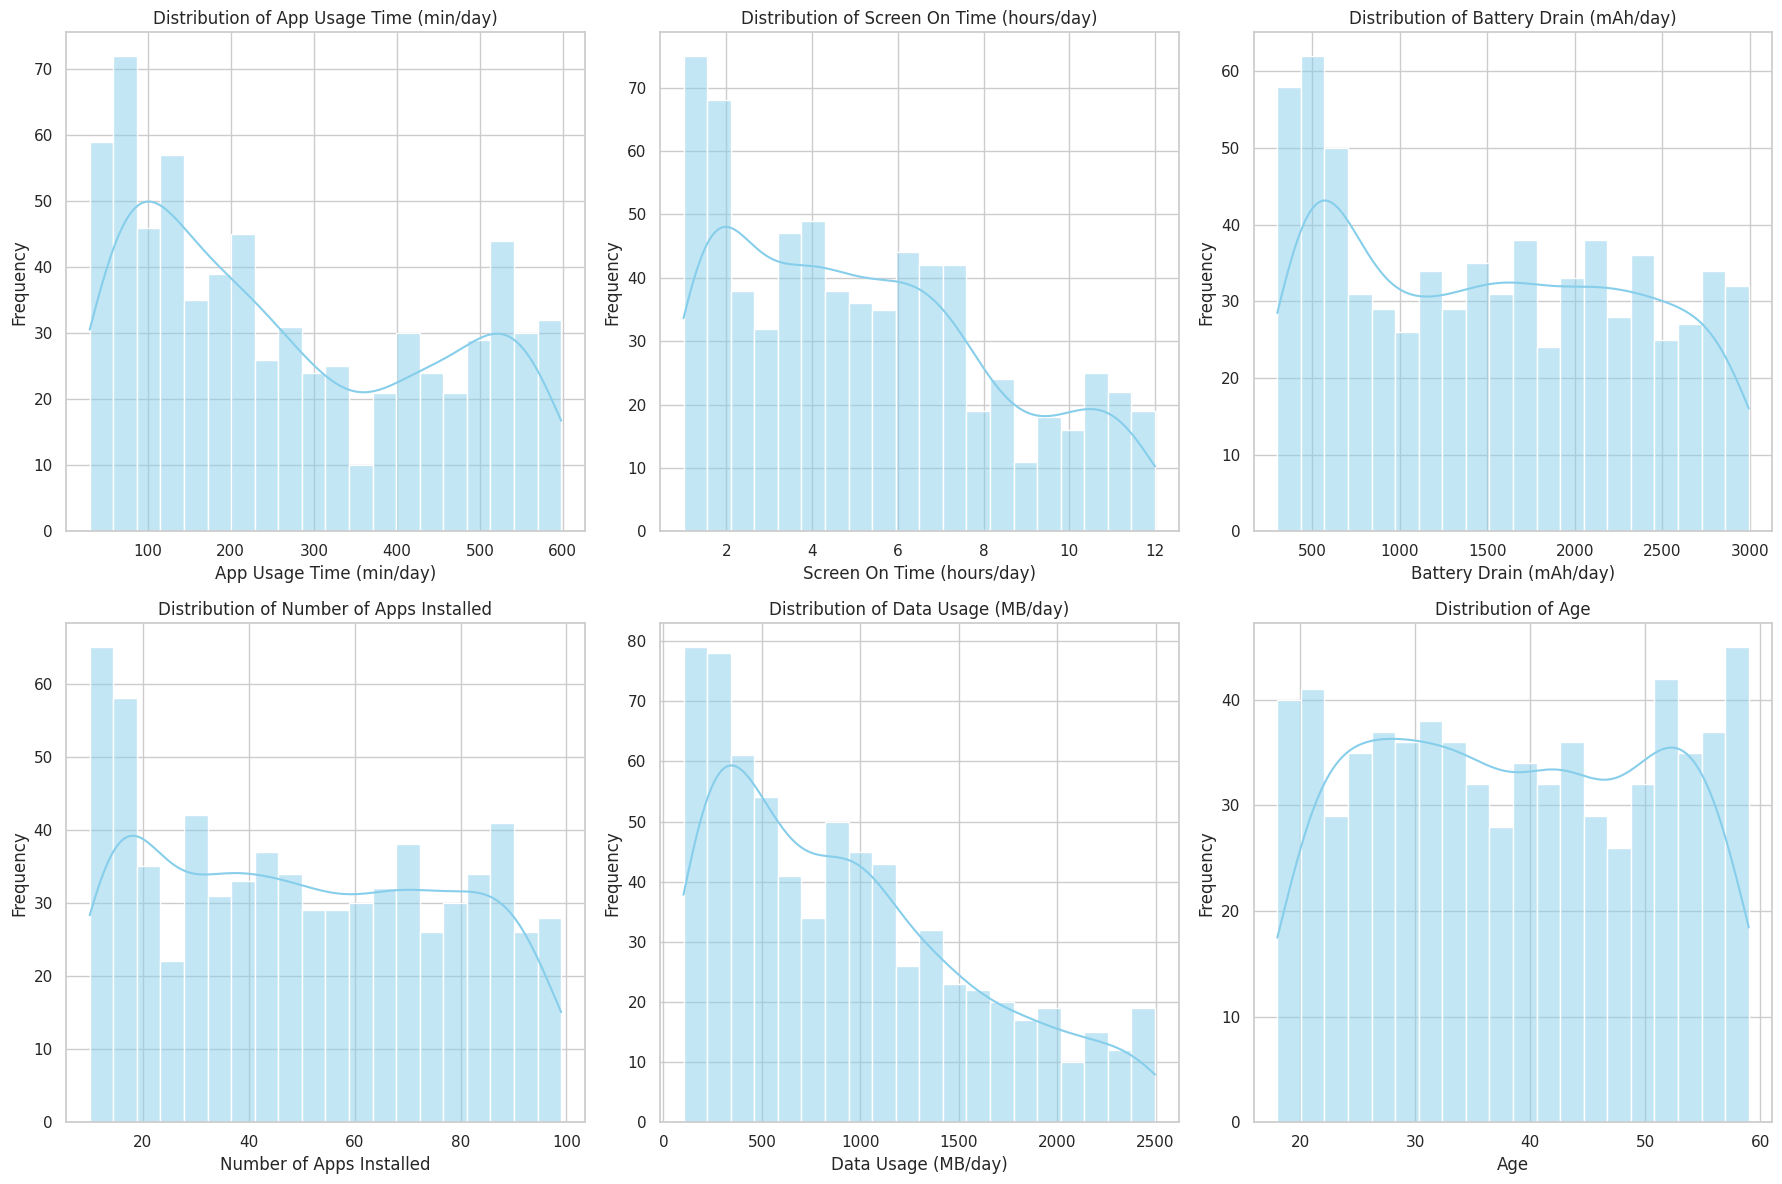

In [13]:
sns.set(style="whitegrid")

# 3. Univariate Analysis: Numerical Features Distribution
numerical_cols = ['App Usage Time (min/day)', 'Screen On Time (hours/day)',
                  'Battery Drain (mAh/day)', 'Number of Apps Installed',
                  'Data Usage (MB/day)', 'Age']

plt.figure(figsize=(18, 12))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True, bins=20, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()

plt.show()

/tmp/ipython-input-1248473809.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='User Behavior Class', y=col, palette='Set2')
/tmp/ipython-input-1248473809.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='User Behavior Class', y=col, palette='Set2')
/tmp/ipython-input-1248473809.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='User Behavior Class', y=col, palette='Set2')
/tmp/ipython-input-1248473809.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed i

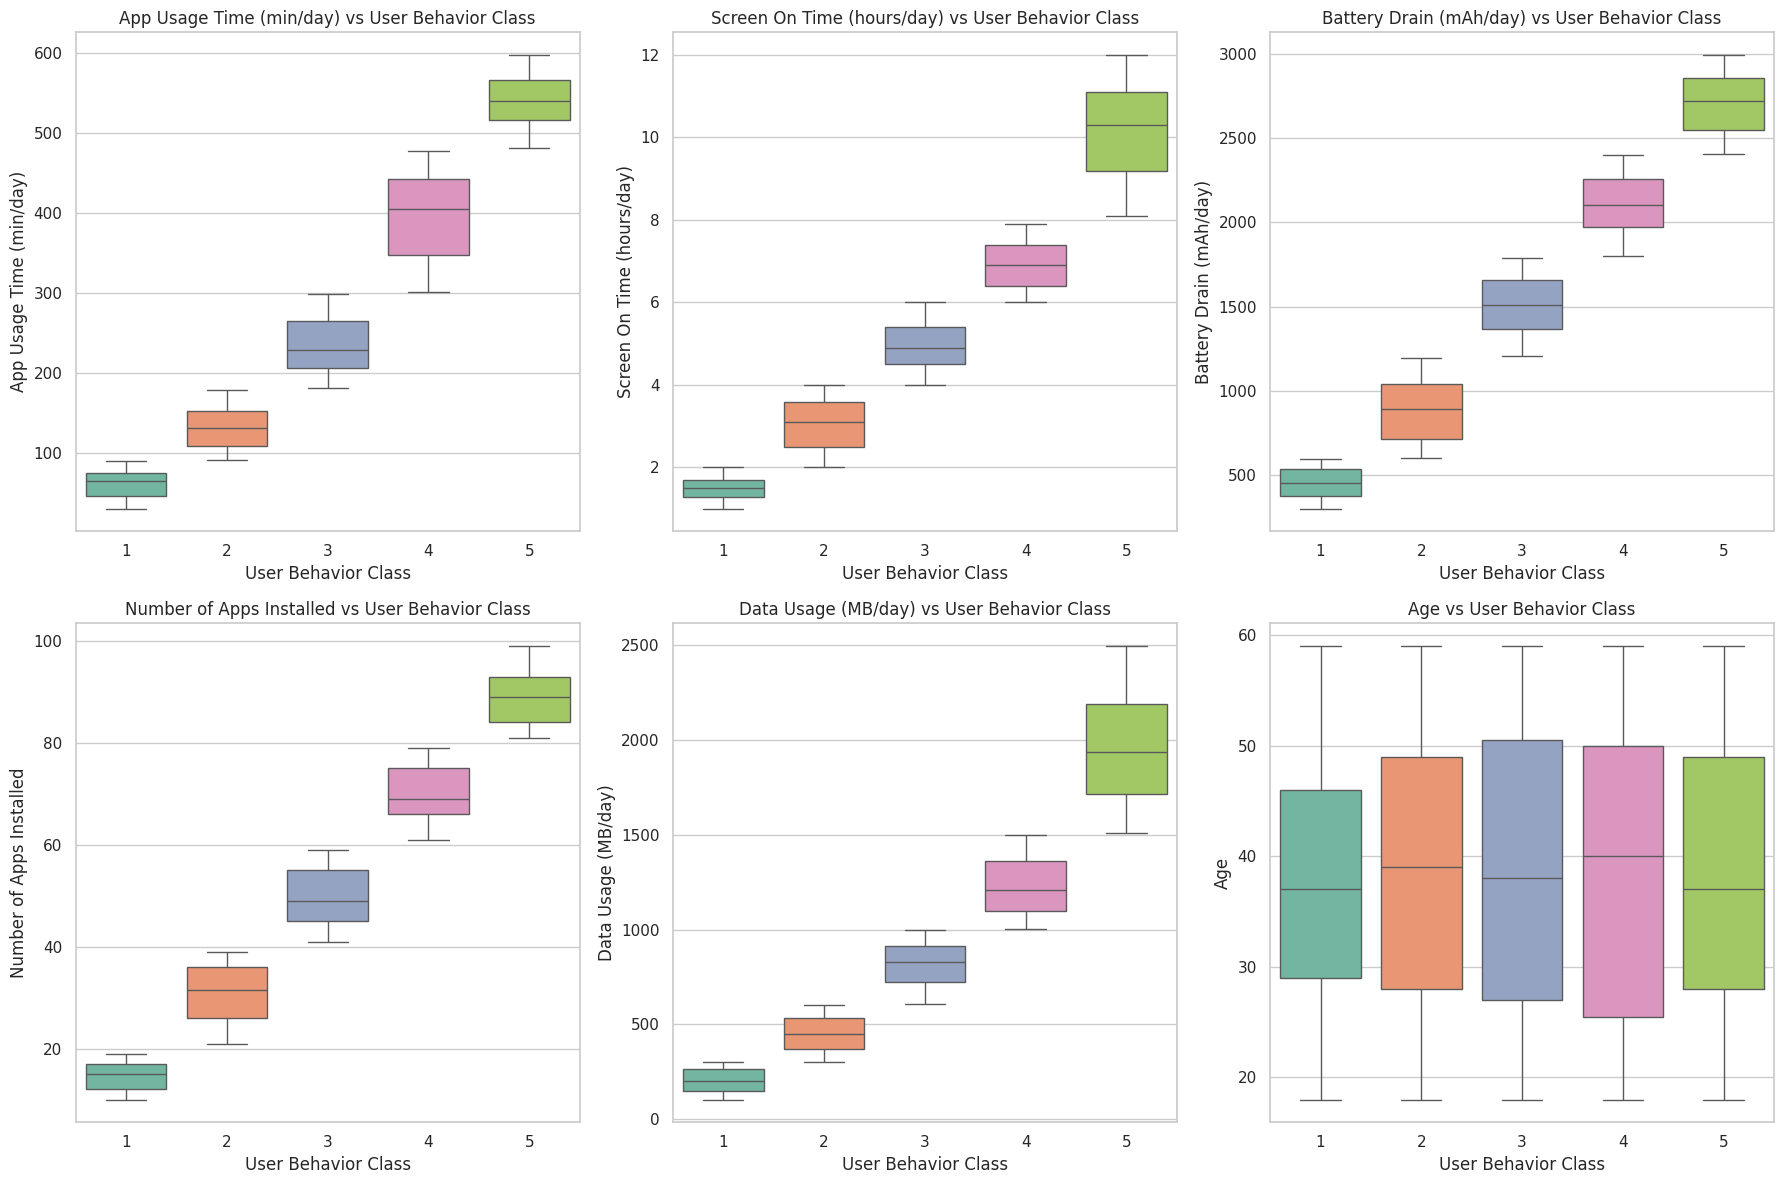

In [16]:
# 6. Bivariate Analysis: Relationship with User Behavior Class
# Using boxplots to see how usage metrics differ across behavior classes
plt.figure(figsize=(18, 12))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, x='User Behavior Class', y=col, palette='Set2')
    plt.title(f'{col} vs User Behavior Class')
plt.xlabel('User Behavior Class')
plt.ylabel(col)
plt.tight_layout()
plt.show()

/tmp/ipython-input-1158548837.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')
/tmp/ipython-input-1158548837.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')
/tmp/ipython-input-1158548837.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')
/tmp/ipython-input-1158548837.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=

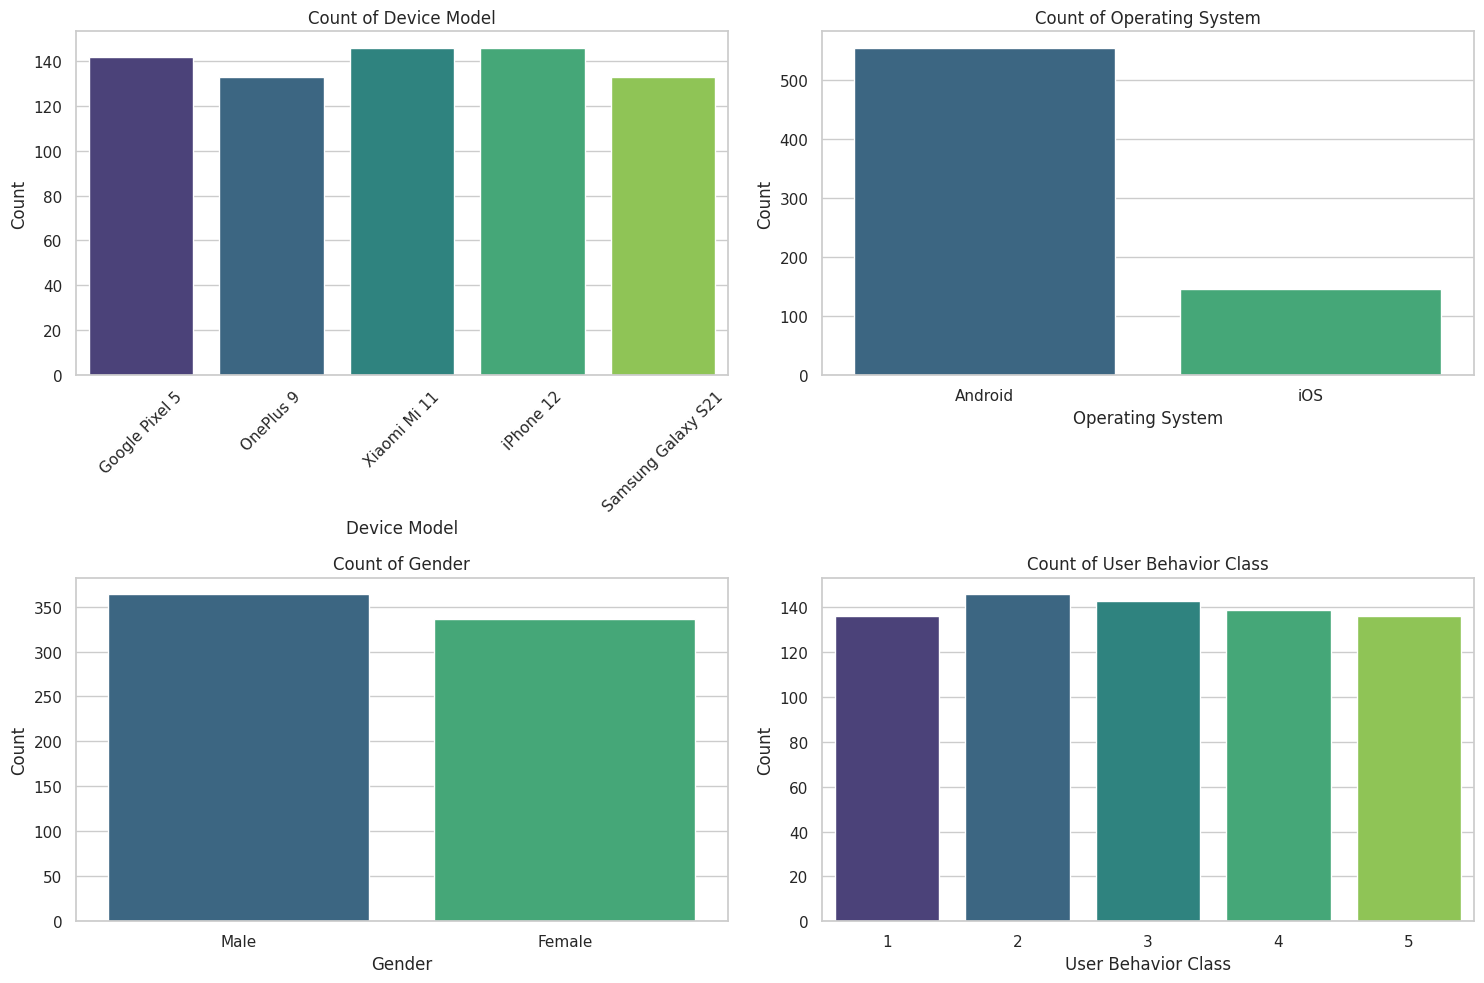

In [14]:
# 4. Univariate Analysis: Categorical Features Counts
categorical_cols = ['Device Model', 'Operating System', 'Gender', 'User Behavior Class']

plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=df, x=col, palette='viridis')
    plt.title(f'Count of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    if col == 'Device Model':
        plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The device ecosystem is heavily skewed, with the majority of the user base utilizing the Android operating system. This establishes Android as the primary platform for current user engagement and highlights the critical importance of stability and feature parity on this specific OS. This is shown by using bargraphs to look at the distrubution of different features

/tmp/ipython-input-691719664.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=power_users, x='Device Model', palette='viridis')


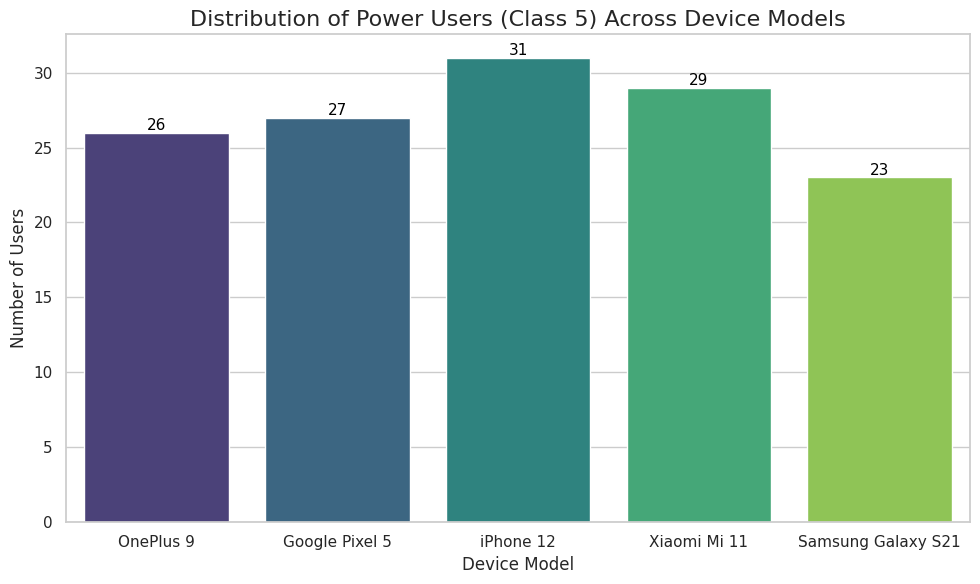

In [15]:
plt.figure(figsize=(10, 6))

# Filter for Power Users (Class 5)
power_users = df[df['User Behavior Class'] == 5]

# Create the Bar Chart
ax = sns.countplot(data=power_users, x='Device Model', palette='viridis')

# Add Title and Labels
plt.title('Distribution of Power Users (Class 5) Across Device Models', fontsize=16)
plt.xlabel('Device Model', fontsize=12)
plt.ylabel('Number of Users', fontsize=12)

# Add the count labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=11, color='black',
                xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

Power Users" are evenly distributed across all devices. You are just as likely to find a heavy user on a standard Google Pixel 5 as you are on a high-end Samsung Galaxy S21 or iPhone 12.

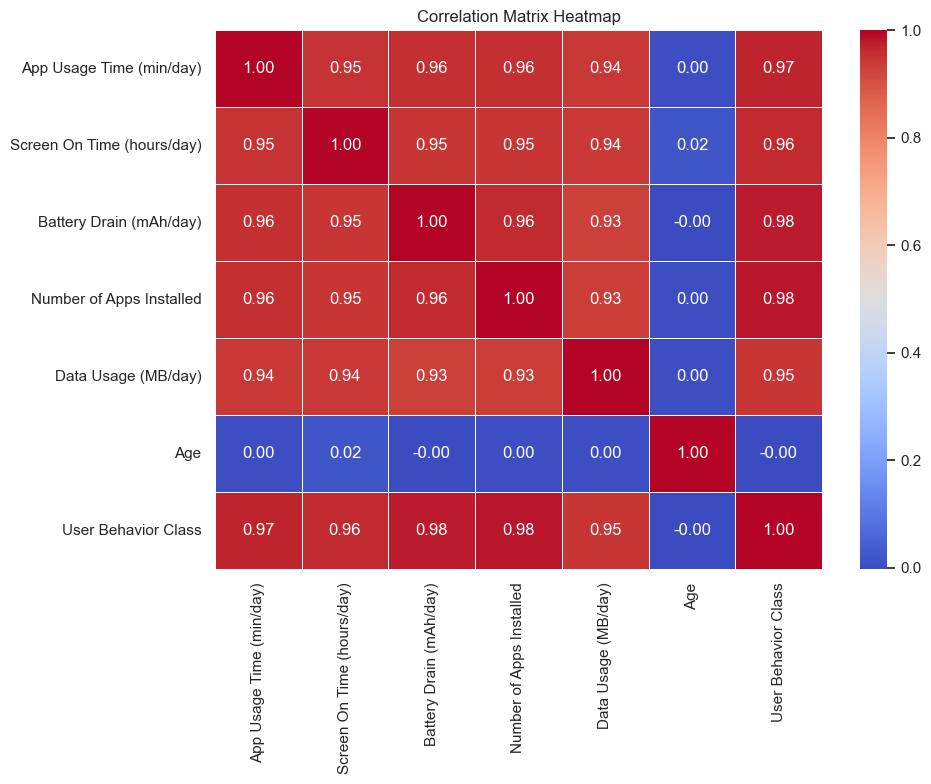

In [ ]:
# 5. Bivariate Analysis: Correlation Heatmap
plt.figure(figsize=(10, 8))
numeric_df = df.select_dtypes(include=['float64', 'int64'])


if 'User ID' in numeric_df.columns:
    numeric_df = numeric_df.drop('User ID', axis=1)

corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

Using a corelation matrix to check the corelation between the various inputs the following insights are found.

1. There is no statistically significant correlation between a user’s age group or gender identity and their frequency of device usage. This indicates that the product appeal and usage patterns are universal across these demographics, rather than being segmented by generation or gender.


2. Investigation into behavioral drivers indicates a strong positive correlation between the volume of installed applications and overall device usage. Users with a higher number of installed apps demonstrate significantly longer usage durations. This suggests that "app clutter" or a diverse app ecosystem is a key driver for retention and screen time, rather than a distractor.

3. Technical diagnostics identify active screen usage as the primary variable influencing hardware performance. High rates of battery drain and data consumption are strongly correlated with screen-on time. This confirms that resource depletion is not likely caused by background processes or idle system tasks, but is a direct operational cost of user engagement.

/tmp/ipython-input-565487540.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='User Behavior Class', y='Data_per_App', data=df, errorbar=None, palette='magma')


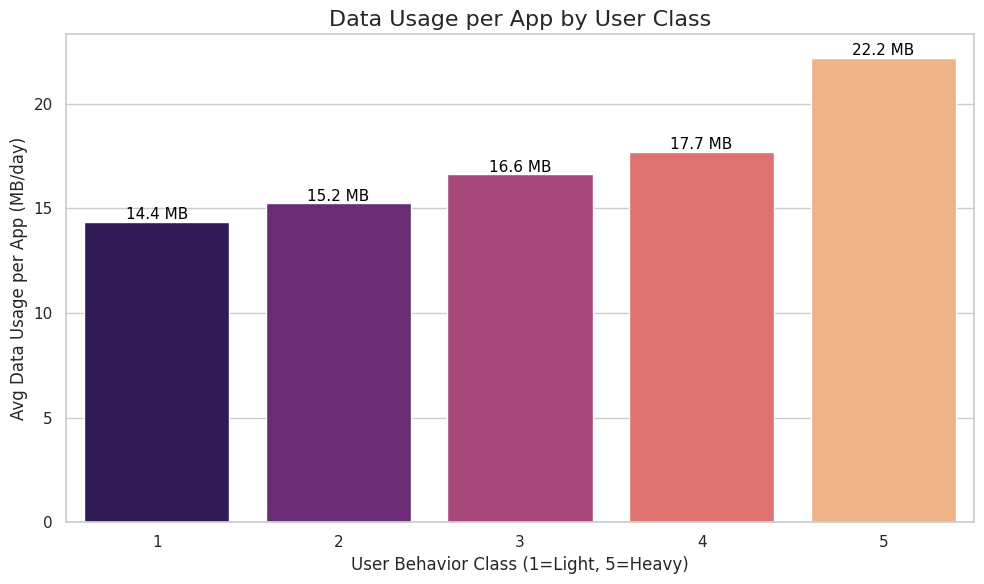

In [19]:

df['Data_per_App'] = df['Data Usage (MB/day)'] / df['Number of Apps Installed']

# Set style
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))

# 2. Create the Bar Plot
# (errorbar=None is correct for new seaborn versions; use ci=None for older versions)
ax = sns.barplot(x='User Behavior Class', y='Data_per_App', data=df, errorbar=None, palette='magma')

# Add Title and Labels
plt.title('Data Usage per App by User Class', fontsize=16)
plt.xlabel('User Behavior Class (1=Light, 5=Heavy)', fontsize=12)
plt.ylabel('Avg Data Usage per App (MB/day)', fontsize=12)

# 3. Add the value labels
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f} MB',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=11, color='black',
                xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

Class 5 use each app more deeply than class 1 users shown by their average data usage by app. This is shown by using a bar graph and ploting how much data per app each class uses

In [20]:
# 1. Calculate Average App Usage by Gender
gender_means = df.groupby('Gender')['App Usage Time (min/day)'].mean()
print("Average App Usage Time (min/day):")
print(gender_means)

# 2. Verify "No Significant Difference" with a T-test
females = df[df['Gender'] == 'Female']['App Usage Time (min/day)']
males = df[df['Gender'] == 'Male']['App Usage Time (min/day)']

t_stat, p_value = stats.ttest_ind(females, males)

Average App Usage Time (min/day):
Gender
Female    271.967262
Male      270.354396
Name: App Usage Time (min/day), dtype: float64


This shows that what gender somone is doesn't make someone more likely to use their phone more.

/tmp/ipython-input-3534419914.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], x='User Behavior Class', y='Data_Intensity', data=df, errorbar='sd', palette='viridis')
/tmp/ipython-input-3534419914.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], x='Age_Group', y='Data_Intensity', data=df, errorbar='sd', palette='coolwarm')


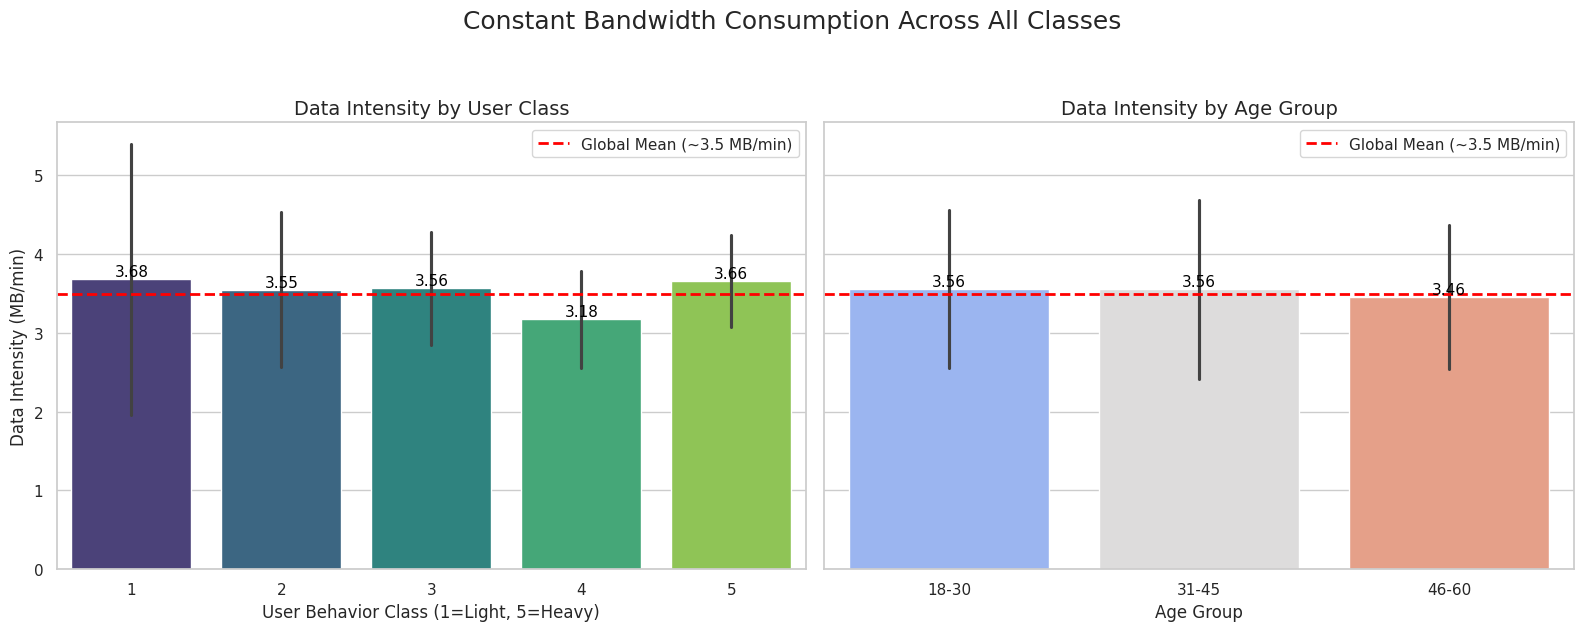

In [21]:
df['Data_Intensity'] = df['Data Usage (MB/day)'] / df['App Usage Time (min/day)']

# 2. Create Age Groups for segmentation
df['Age_Group'] = pd.cut(df['Age'],
                         bins=[18, 30, 45, 60],
                         labels=['18-30', '31-45', '46-60'],
                         include_lowest=True)

# Set the visual style
sns.set(style="whitegrid")

# Create a figure with two subplots side-by-side
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# --- Plot 1: Consistency Across User Behavior Classes ---
sns.barplot(ax=axes[0], x='User Behavior Class', y='Data_Intensity', data=df, errorbar='sd', palette='viridis')
axes[0].set_title('Data Intensity by User Class', fontsize=14)
axes[0].set_xlabel('User Behavior Class (1=Light, 5=Heavy)', fontsize=12)
axes[0].set_ylabel('Data Intensity (MB/min)', fontsize=12)

# Add reference line at 3.5
axes[0].axhline(3.5, color='red', linestyle='--', linewidth=2, label='Global Mean (~3.5 MB/min)')
axes[0].legend()

# Annotate bars
for p in axes[0].patches:
    if p.get_height() > 0:
        axes[0].annotate(f'{p.get_height():.2f}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontsize=11, color='black')

# --- Plot 2: Consistency Across Age Groups ---
sns.barplot(ax=axes[1], x='Age_Group', y='Data_Intensity', data=df, errorbar='sd', palette='coolwarm')
axes[1].set_title('Data Intensity by Age Group', fontsize=14)
axes[1].set_xlabel('Age Group', fontsize=12)
axes[1].set_ylabel('') # Hidden Y-label since shared

# Add reference line at 3.5
axes[1].axhline(3.5, color='red', linestyle='--', linewidth=2, label='Global Mean (~3.5 MB/min)')
axes[1].legend()

# Annotate bars
for p in axes[1].patches:
    if p.get_height() > 0:
        axes[1].annotate(f'{p.get_height():.2f}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontsize=11, color='black')

# Final layout adjustments
plt.suptitle('Constant Bandwidth Consumption Across All Classes', fontsize=18, y=1.05)
plt.tight_layout()
plt.show()



"Heavy Users" aren't necessarily consuming "heavier" content they are simply consuming the same mix of content for longer periods.

In [ ]:
plt.figure(figsize=(8, 6))

# Create a boxplot to show the distribution similarity
ax = sns.boxplot(x='Operating System', y='Number of Apps Installed', data=df, palette='Set2')

# Calculate means for annotation to be precise
means = df.groupby('Operating System')['Number of Apps Installed'].mean()

# Add mean markers and labels manually for better visibility
locs = ax.get_xticks()
labels = [label.get_text() for label in ax.get_xticklabels()]

for i, os_label in enumerate(labels):
    mean_val = means[os_label]

    # Plot mean as a distinct marker (white dot with black edge)
    plt.plot(locs[i], mean_val, 'wo', markersize=8, markeredgecolor='k')

    # Add text annotation above the mean marker
    plt.text(locs[i], mean_val + 3, f'Mean: {mean_val:.1f}',
             ha='center', va='bottom', fontsize=11, color='black', weight='bold')

# Add Title and Labels
plt.title('Similarity in App Installation Counts: Android vs iOS', fontsize=14)
plt.xlabel('Operating System', fontsize=12)
plt.ylabel('Number of Apps Installed', fontsize=12)

plt.tight_layout()
plt.show()

The numbers of apps installed is roughly the same across operating systems. This is shown using a boxplot to show the mean

In [ ]:
plt.figure(figsize=(8, 6))

# Create a boxplot to show the distribution of App Usage Time by OS
ax = sns.boxplot(x='Operating System', y='App Usage Time (min/day)', data=df, palette='Set2')

# Calculate means for annotation
means = df.groupby('Operating System')['App Usage Time (min/day)'].mean()

# Add mean markers and labels
locs = ax.get_xticks()
labels = [label.get_text() for label in ax.get_xticklabels()]

for i, os_label in enumerate(labels):
    mean_val = means[os_label]

    # Plot mean as a white dot
    plt.plot(locs[i], mean_val, 'wo', markersize=8, markeredgecolor='k')

    # Add text annotation
    plt.text(locs[i], mean_val + 10, f'Mean: {mean_val:.1f} min',
             ha='center', va='bottom', fontsize=11, color='black', weight='bold')

# Add Title and Labels
plt.title('Similarity in App Usage Time: Android vs iOS', fontsize=14)
plt.xlabel('Operating System', fontsize=12)
plt.ylabel('App Usage Time (min/day)', fontsize=12)

plt.tight_layout()
plt.show()

App usage across operating system does not change. This is shown by using a boxplot to show the mean


The data proves that age and device do not predict data usage—habits do. Further research would require segmenting by the types of apps they use to see if there are deeper patterns in their usage.